# Frequent Itemsets and Association Rules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth, fpmax, association_rules

## (a)

In [3]:
data = pd.read_csv('./frequent_itemsets_and_association_rules/online_retail.csv', sep=';', decimal=',')
display(data.head())
display(data.info())

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536370,ALARM CLOCK BAKELIKE PINK,24,01.12.2010 08:45,3.75,12583.0,France
1,536370,ALARM CLOCK BAKELIKE RED,24,01.12.2010 08:45,3.75,12583.0,France
2,536370,ALARM CLOCK BAKELIKE GREEN,12,01.12.2010 08:45,3.75,12583.0,France
3,536370,PANDA AND BUNNIES STICKER SHEET,12,01.12.2010 08:45,0.85,12583.0,France
4,536370,STARS GIFT TAPE,24,01.12.2010 08:45,0.65,12583.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29313 entries, 0 to 29312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      29313 non-null  int64  
 1   Itemname    29313 non-null  object 
 2   Quantity    29313 non-null  int64  
 3   Date        29313 non-null  object 
 4   Price       29313 non-null  float64
 5   CustomerID  29208 non-null  float64
 6   Country     29313 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


None

                   Itemname  SalesValuePerItem
0                   POSTAGE            59489.5
1  REGENCY CAKESTAND 3 TIER            18961.8
2        RABBIT NIGHT LIGHT            18836.0

The total sales value is:  983566.6499999999
        Country  SalesValuePerCountry
0   Netherlands             285446.34
1       Germany             228867.14
2        France             209715.11
3         Spain              61577.11
4       Belgium              41196.34
5        Sweden              38378.33
6        Norway              36165.44
7      Portugal              33747.10
8         Italy              17483.24
9       Austria              10198.68
10       Poland               7334.65
11       Greece               4760.52
12      Iceland               4310.00
13        Malta               2725.59
14    Lithuania               1661.06


C:\Users\ferey\AppData\Local\Temp\ipykernel_21000\1398971987.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  SalesValuePerItem = data.groupby('Itemname', group_keys=False).apply(lambda x: (x['Quantity'] * x['Price']).sum())
C:\Users\ferey\AppData\Local\Temp\ipykernel_21000\1398971987.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  SalesValuePerCountry = data.groupby('Country', group_keys=False).app

<BarContainer object of 15 artists>

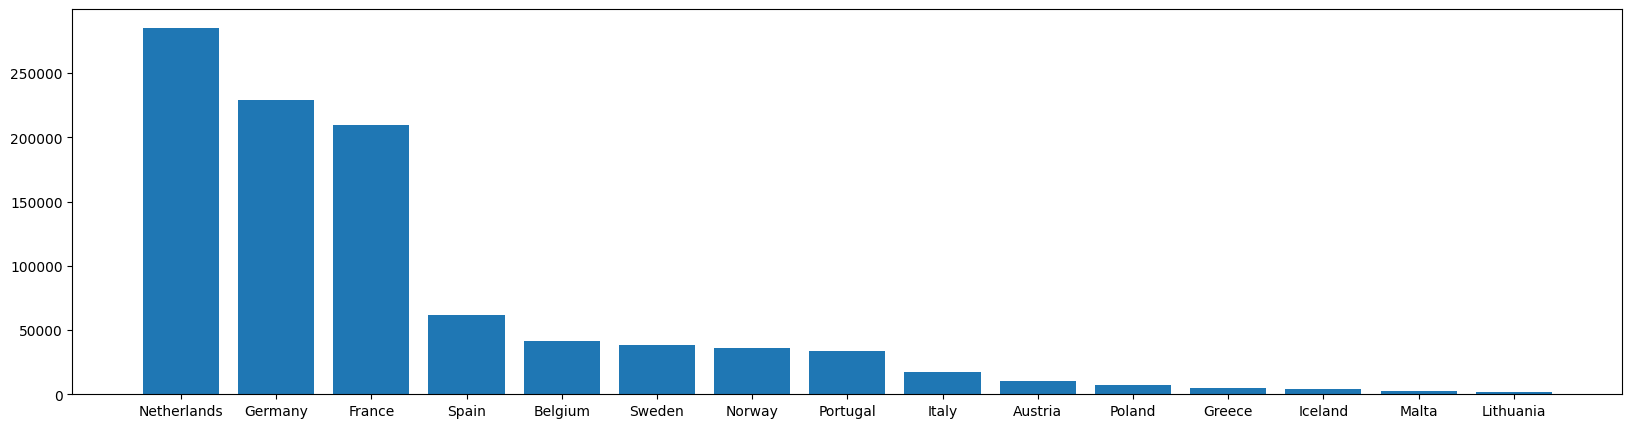

In [28]:
# Calculate the total sales value for each item 
SalesValuePerItem = data.groupby('Itemname', group_keys=False).apply(lambda x: (x['Quantity'] * x['Price']).sum())
SortedSalesValuePerItem = SalesValuePerItem.sort_values(ascending=False).reset_index(name='SalesValuePerItem')
# Display the top 3 items with the highest sales value
print(SortedSalesValuePerItem.head(3))

  
#Calculate the total sales value
SumOfSalesValue = SalesValuePerItem.sum()
print("\nThe total sales value is: ", SumOfSalesValue)

# Calculate the total sales value for each country
SalesValuePerCountry = data.groupby('Country', group_keys=False).apply(lambda x: (x['Quantity'] * x['Price']).sum())
SortedSalesValuePerCountry = SalesValuePerCountry.sort_values(ascending=False).reset_index(name='SalesValuePerCountry')
print(SortedSalesValuePerCountry)

# Plot the total sales value for each country
plt.figure(figsize=(20, 5))
plt.bar(SortedSalesValuePerCountry['Country'], SortedSalesValuePerCountry['SalesValuePerCountry'])

## (b)

In [29]:
# Create a transaction for each BillNo
transactions = data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0).astype(bool)
transaction_attributes = data.groupby('BillNo')[['Date', 'CustomerID', 'Country']].first()
display(transactions.head())
display(transaction_attributes.head())
n_transactions = transactions.shape[0]

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536403,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Date,CustomerID,Country
BillNo,,,
536370,01.12.2010 08:45,12583.0,France
536403,01.12.2010 11:27,12791.0,Netherlands
536527,01.12.2010 13:04,12662.0,Germany
536532,01.12.2010 13:24,12433.0,Norway
536840,02.12.2010 18:27,12738.0,Germany


In [ ]:
# Your code here

## (c)

## (d)

In [ ]:
# Your code here

## (e)

In [ ]:
# Your code here

## (f)

In [ ]:
# Your code here

## (g)

In [ ]:
# Your code here

## (h)

In [ ]:
# Your code here

## (i)

In [ ]:
# Your code here

## (j)

In [ ]:
# Your code here